In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data

## Davidson

**Traditional hate speech dataset, show bias against AAE on offensive language labeling**

In [15]:
# multi-class labels, either hate_speech or offensive lan or neither
df_davidson = pd.read_csv('../data/davidson_dial.csv')
df_davidson.columns

Index(['id', 'count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet', 'hate_speech_rel', 'offensive_language_rel', 'neither_rel',
       'aav', 'hispanic', 'other', 'white', 'label'],
      dtype='object')

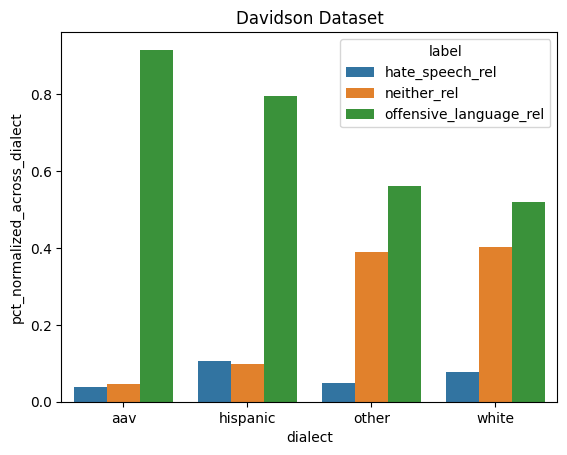

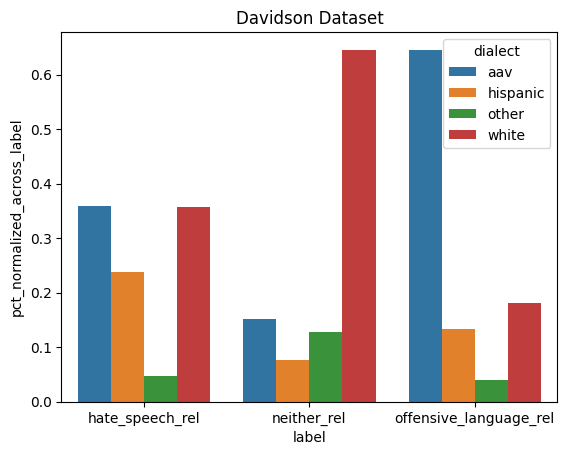

In [51]:
def normalize(row,var):
    return len(df_davidson[df_davidson[var]==row[var]])

df_davidson['dialect'] = df_davidson[['aav','hispanic','other','white']].idxmax(axis=1)

dialect_label_stats = df_davidson.groupby(['dialect','label'])['id'].count().reset_index()
dialect_label_stats['pct_normalized_across_dialect'] = dialect_label_stats['id']/dialect_label_stats.apply(normalize,args=('dialect',),axis=1)
dialect_label_stats['pct_normalized_across_label'] = dialect_label_stats['id']/dialect_label_stats.apply(normalize,args=('label',),axis=1)

sns.barplot(data = dialect_label_stats, x='dialect',y='pct_normalized_across_dialect',hue='label')
plt.title('Davidson Dataset')
plt.show()

sns.barplot(data = dialect_label_stats, x='label',y='pct_normalized_across_label',hue='dialect')
plt.title('Davidson Dataset')
plt.show()

In [52]:
dialect_label_stats

,dialect,label,id,pct_normalized_across_dialect,pct_normalized_across_label
0,aav,hate_speech_rel,514,0.037962,0.359441
1,aav,neither_rel,630,0.046529,0.151333
2,aav,offensive_language_rel,12396,0.915510,0.645961
3,hispanic,hate_speech_rel,340,0.105754,0.237762
4,hispanic,neither_rel,315,0.097978,0.075667
5,hispanic,offensive_language_rel,2560,0.796267,0.133403
6,other,hate_speech_rel,66,0.048565,0.046154
7,other,neither_rel,530,0.389993,0.127312
8,other,offensive_language_rel,763,0.561442,0.039760
9,white,hate_speech_rel,510,0.076473,0.356643


## Founta dataset

In [54]:
df_founta = pd.read_csv('../data/founta_all_dial.csv')
print(df_founta.columns)
print(pd.unique(df_founta.label))

Index(['id', 'label', 'tweet', 'votes', 'aav', 'hispanic', 'other', 'white'], dtype='object')
['spam' 'abusive' 'normal' 'hateful']


In [71]:
# what's spam??
for r,row in df_founta[df_founta.label=='spam'].iterrows():
    print(r,row['tweet'])
    if r > 100:
        break

0 Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE
10 Uber finds one allegedly stolen Waymo file – on an employee’s personal device https://t.co/ZLmrbf6S3O https://t.co/v4IdDN4hvu
26 4X DIY Birds Stencil Cutting Carbon Scrapbooking Card Diary Stamping Template FT https://t.co/GhSTgNHWxS https://t.co/onc8bySr62
35 one person followed me and 2 people unfollowed me // automatically checked by https://t.co/TSuRXiqGnP
49 #Farmville2 Giveaway Saturday Gifts (April 8, 2017) #Farmville2Info https://t.co/D4SZzsHa70 https://t.co/zW6Ce2rE0X
50 "Official look at the Air Jordan 13 Low ""Brave Blue"" releasing next weekend. https://t.co/MuPKIhR1oN https://t.co/klxVYxZarP"
58 You are a force to be reckoned with wherever you go now, and ... More for Aries https://t.co/XE6TWavcNQ
63 Transanimation accounted against scarcely 70 entering the may avails in reference to chinese the screen.: Vsxr https://t.co/SIY5RZO6Va
65 You want to dig in your heels

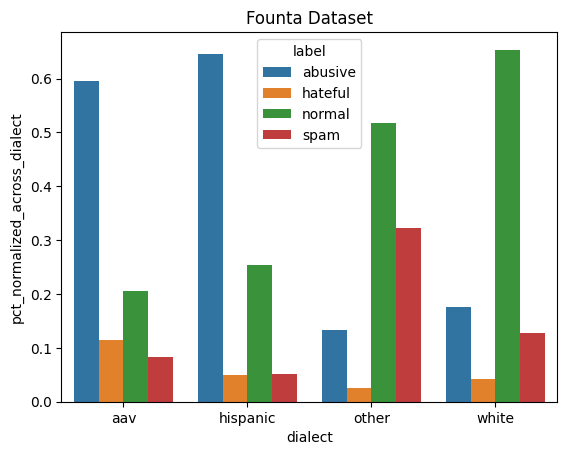

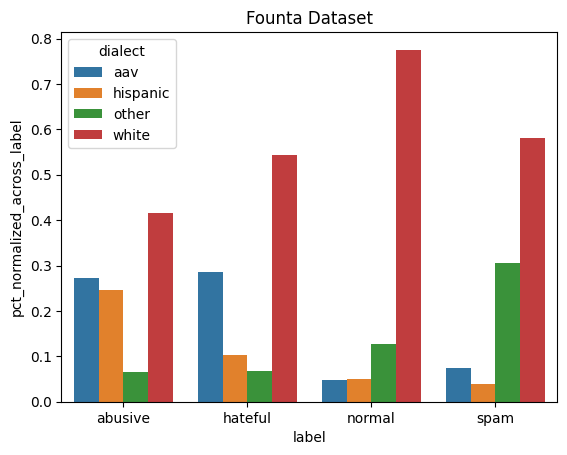

In [57]:
def normalize(row,var):
    return len(df_founta[df_founta[var]==row[var]])

df_founta['dialect'] = df_founta[['aav','hispanic','other','white']].idxmax(axis=1)

dialect_label_stats = df_founta.groupby(['dialect','label'])['id'].count().reset_index()
dialect_label_stats['pct_normalized_across_dialect'] = dialect_label_stats['id']/dialect_label_stats.apply(normalize,args=('dialect',),axis=1)
dialect_label_stats['pct_normalized_across_label'] = dialect_label_stats['id']/dialect_label_stats.apply(normalize,args=('label',),axis=1)

sns.barplot(data = dialect_label_stats, x='dialect',y='pct_normalized_across_dialect',hue='label')
plt.title('Founta Dataset')
plt.show()

sns.barplot(data = dialect_label_stats, x='label',y='pct_normalized_across_label',hue='dialect')
plt.title('Founta Dataset')
plt.show()

In [58]:
dialect_label_stats

,dialect,label,id,pct_normalized_across_dialect,pct_normalized_across_label
0,aav,abusive,7392,0.595409,0.272265
1,aav,hateful,1420,0.114378,0.286002
2,aav,normal,2562,0.206363,0.047576
3,aav,spam,1041,0.083850,0.074198
4,hispanic,abusive,6707,0.645214,0.247035
5,hispanic,hateful,509,0.048966,0.102518
6,hispanic,normal,2638,0.253776,0.048987
7,hispanic,spam,541,0.052044,0.038560
8,other,abusive,1770,0.133023,0.065193
9,other,hateful,340,0.025552,0.068479


## genearate train_data

In [102]:
df_davidson.rename(columns={'id':'davidson_id'},inplace=True)
df_founta.rename(columns={'id':'founta_id'},inplace=True)

train_data = pd.concat([df_davidson[['davidson_id','tweet','label']],df_founta[['founta_id','tweet','label']]],axis=0)
train_data.rename(columns={'label':'og_label'},inplace=True)
train_data['label'] = 0
train_data.loc[train_data['og_label'].isin(('hate_speech_rel','offensive_language_rel','hateful','abusive')),'label'] = 1
print(len(train_data))
train_data = train_data.drop_duplicates(subset=['tweet'],keep=False)
print(len(train_data))

124779
114774


In [106]:
train_data

,davidson_id,tweet,og_label,founta_id,label
0,0.0,!!! RT @mayasolovely: As a woman you shouldn't...,neither_rel,NaN,0
1,1.0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language_rel,NaN,1
2,2.0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language_rel,NaN,1
3,3.0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language_rel,NaN,1
4,4.0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language_rel,NaN,1
...,...,...,...,...,...
99991,NaN,RT @shangros: my fucking queen https://t.co/wa...,abusive,t99991,1
99992,NaN,#Osteporosis treated with #PEMF - rebuild bone...,normal,t99992,0
99993,NaN,@LGUSAMobile why does my phone screen keeps fl...,normal,t99993,0
99994,NaN,#bigdata vs. #reality ... but equally applies ...,normal,t99994,0


## Sap19 Dataset

***dialect* and *race priming* as ways to reduce the racial bias in annotation**

In [187]:
df_sap19 = pd.read_csv('../data/sap2019risk_mTurkExperiment.csv')

df_sap19 = df_sap19.reset_index()
df_sap19 = df_sap19.rename(columns={'index':'sap19_id'})
print(len(df_sap19))
df_sap19 = df_sap19[~(df_sap19.raceIsWrong=='on')]
df_sap19 = df_sap19[~(df_sap19.dialectIsWrong=='on')]
print(len(df_sap19))

print(df_sap19.columns)
print(pd.unique(df_sap19['davidson_label']))
print(pd.unique(df_sap19['founta_label']))
print(pd.unique(df_sap19['condition']))

11706
11558
Index(['sap19_id', 'annotatorAge', 'annotatorGender', 'annotatorMinority',
       'annotatorPolitics', 'annotatorRace', 'intentYN', 'offensive2anyoneYN',
       'offensive2youYN', 'dialectIsWrong', 'raceIsWrong', 'WorkerIdHashed',
       'tweet', 'dialect', 'condition', 'username', 'davidson_label',
       'founta_label'],
      dtype='object')
['neither_rel' 'hate_speech_rel' 'offensive_language_rel' nan]
[nan 'normal' 'spam' 'hateful' 'abusive']
['text-only' 'dialect-priming' 'race-priming']


In [79]:
# # test data - text, ogLabel
# train_data = df_sap19[['sap19_id','tweet','davidson_label','founta_label']]
# print(len(train_data))
# train_data = train_data.drop_duplicates(subset=['tweet','davidson_label','founta_label'])
# print(len(train_data))
# train_data['label'] = 0
# train_data.loc[train_data['davidson_label'].isin(('hate_speech_rel','offensive_language_rel')),'label'] = 1
# train_data.loc[train_data['founta_label'].isin(('hateful','abusive')),'label'] = 1

11706
1331


In [188]:
# test data relax - dialect/race primed answers
test_data_relaxed = df_sap19[df_sap19['condition']!='text-only']

test_data_relaxed.loc[test_data_relaxed['condition']=='dialect-priming','condition'] = test_data_relaxed.loc[test_data_relaxed['condition']=='dialect-priming','dialect']
test_data_relaxed.loc[test_data_relaxed['condition']=='race-priming','condition'] = test_data_relaxed.loc[test_data_relaxed['condition']=='race-priming','username']
print(pd.unique(test_data_relaxed['condition']))

test_data_relaxed.loc[test_data_relaxed['condition']=='a Twitter user that is likely Black/African-American','condition'] = 'African-American'
test_data_relaxed.loc[test_data_relaxed['condition']=='a Twitter user','condition'] = np.NaN
test_data_relaxed.loc[test_data_relaxed['condition']=='a Twitter user that is likely White/Caucasian','condition'] = 'White/Caucasian'
test_data_relaxed.loc[test_data_relaxed['condition']=='a Twitter user that is likely Latino/Latina/Hispanic','condition'] = 'Latino'
test_data_relaxed.loc[test_data_relaxed['condition']=='General American','condition'] = 'White/Caucasian'
print(pd.unique(test_data_relaxed['condition']))

test_data_relaxed['relaxed_unbiased_label'] = (test_data_relaxed[['intentYN', 'offensive2anyoneYN', 'offensive2youYN']].max(axis=1) > 0.5).astype(int)

test_data_relaxed = pd.concat([test_data_relaxed.groupby('tweet')[['condition', 'davidson_label', 'founta_label']].last(), 
           ((test_data_relaxed.groupby('tweet')['relaxed_unbiased_label'].sum()/test_data_relaxed.groupby('tweet')['relaxed_unbiased_label'].count())>0.5).astype(int)],
          axis=1)
test_data_relaxed.reset_index(inplace=True)
test_data_relaxed

['African-American' nan 'General American' 'Latino'
 'a Twitter user that is likely Black/African-American' 'a Twitter user'
 'a Twitter user that is likely White/Caucasian'
 'a Twitter user that is likely Latino/Latina/Hispanic']
['African-American' nan 'White/Caucasian' 'Latino']


/var/folders/gn/1599mksx4wjcpgm_jjp35nxh0000gn/T/ipykernel_52473/1374015666.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_relaxed['relaxed_unbiased_label'] = (test_data_relaxed[['intentYN', 'offensive2anyoneYN', 'offensive2youYN']].max(axis=1) > 0.5).astype(int)


,tweet,condition,davidson_label,founta_label,relaxed_unbiased_label
0,""" i spend my money how i want bitch its my bus...",African-American,offensive_language_rel,None,1
1,"""""""Couture, Thornton out indefinitely as Shark...",None,None,normal,0
2,"""""""It takes a village to raise a child"""" FFS A...",None,None,hateful,1
3,"""""""Nicki Minaj Shows Off Her Big Boobs In Larg...",African-American,None,spam,0
4,"""""""See you after 2 hoes"""" """"Hours*"""" I fucking...",None,None,abusive,0
...,...,...,...,...,...
1317,{He Now Calls Another Woman's Name In His Slee...,African-American,None,normal,0
1318,~*~*New Track*~*~:: ‘Hot Science + Luxi - Have...,None,None,spam,0
1319,‘Holy Mountain Picnic Massacre Blues EP’ 12’’ ...,None,None,hateful,0
1320,╭&#128151;➱ #EADT930 ┊B.T ╰&#127800;➱Kiss&#128...,African-American,None,spam,0


In [234]:
# test data strict - annotator's race and author's race are the same
test_data_strict = df_sap19[df_sap19['condition']!='text-only']

test_data_strict.loc[test_data_strict['condition']=='dialect-priming','condition'] = test_data_strict.loc[test_data_strict['condition']=='dialect-priming','dialect']
test_data_strict.loc[test_data_strict['condition']=='race-priming','condition'] = test_data_strict.loc[test_data_strict['condition']=='race-priming','username']
print(pd.unique(test_data_strict['condition']))

test_data_strict.loc[test_data_strict['condition']=='a Twitter user that is likely Black/African-American','condition'] = 'African-American'
test_data_strict.loc[test_data_strict['condition']=='a Twitter user','condition'] = np.NaN
test_data_strict.loc[test_data_strict['condition']=='a Twitter user that is likely White/Caucasian','condition'] = 'White/Caucasian'
test_data_strict.loc[test_data_strict['condition']=='a Twitter user that is likely Latino/Latina/Hispanic','condition'] = 'Latino'
test_data_strict.loc[test_data_strict['condition']=='General American','condition'] = 'White/Caucasian'
print(pd.unique(test_data_strict['condition']))

print(len(test_data_strict))
def propagate_condition(row):
    try:
        return test_data_strict.loc[test_data_strict['tweet'] == row['tweet'],'condition'].iloc[0,]
    except:
        return 'text-only'
tmp = df_sap19.loc[df_sap19['condition']=='text-only']
tmp['condition'] = tmp.apply(propagate_condition,axis=1)
tmp = tmp[tmp['condition']!='text-only']
test_data_strict = pd.concat([test_data_strict,tmp],axis=0)
print(len(test_data_strict))

test_data_strict = test_data_strict[((test_data_strict['condition']=='African-American') & (test_data_strict['annotatorRace']=='black')) | ((test_data_strict['condition']=='White/Caucasian') & (test_data_strict['annotatorRace']=='white')) | ((test_data_strict['condition']=='Latino') & (test_data_strict['annotatorRace']=='hisp'))]
print(len(test_data_strict))

test_data_strict['strict_unbiased_label'] = (test_data_strict[['intentYN', 'offensive2anyoneYN', 'offensive2youYN']].max(axis=1) > 0.5).astype(int)

test_data_strict = pd.concat([test_data_strict.groupby('tweet')[['condition', 'davidson_label', 'founta_label']].last(), 
           test_data_strict.groupby('tweet')['annotatorRace'].apply(list),
           ((test_data_strict.groupby('tweet')['strict_unbiased_label'].sum()/test_data_strict.groupby('tweet')['strict_unbiased_label'].count())>0.5).astype(int)],
          axis=1)
test_data_strict.reset_index(inplace=True)
test_data_strict

['African-American' nan 'General American' 'Latino'
 'a Twitter user that is likely Black/African-American' 'a Twitter user'
 'a Twitter user that is likely White/Caucasian'
 'a Twitter user that is likely Latino/Latina/Hispanic']
['African-American' nan 'White/Caucasian' 'Latino']
7652
11557
2577


/var/folders/gn/1599mksx4wjcpgm_jjp35nxh0000gn/T/ipykernel_52473/1017881349.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['condition'] = tmp.apply(propagate_condition,axis=1)


,tweet,condition,davidson_label,founta_label,annotatorRace,strict_unbiased_label
0,"""""""Nicki Minaj Shows Off Her Big Boobs In Larg...",African-American,None,spam,[black],0
1,"""""""Success is not impossible, but changing suc...",White/Caucasian,None,normal,"[white, white, white, white, white]",0
2,"""""""The business of business is relationships; ...",White/Caucasian,None,normal,"[white, white, white, white, white, white]",0
3,"""#OpExposeCPS TEACHERS too! Another """"trusted""...",Latino,None,spam,"[hisp, hisp]",1
4,"""@user """"That's it? Huh?"""" She pushed the leg ...",White/Caucasian,None,hateful,"[white, white, white, white, white, white]",0
...,...,...,...,...,...,...
592,thoughts on persona 5 so far: RLY GOOD?! THo I...,White/Caucasian,None,normal,"[white, white, white, white, white, white, white]",0
593,today i start breaking in a new pair of docs h...,White/Caucasian,neither_rel,None,"[white, white, white, white, white, white, whi...",0
594,when you secretly hate the bitch https://t.co/...,Latino,None,abusive,"[hisp, hisp, hisp]",1
595,why was I so blind and fucking dumb to see tha...,White/Caucasian,None,abusive,"[white, white, white, white, white, white]",0


In [212]:
# # THIS IS A PROBLEM!!
# tmp = df_sap19[df_sap19.tweet=='"""Success is not impossible, but changing such a mindset is like a battle."" https://t.co/PxGUVk0zb8 https://t.co/a5D1OF8H5Z"']
# # tmp = test_data_strict[test_data_strict.tweet=='"""Success is not impossible, but changing such a mindset is like a battle."" https://t.co/PxGUVk0zb8 https://t.co/a5D1OF8H5Z"']
# # tmp['strict_unbiased_label'] = (tmp[['intentYN', 'offensive2anyoneYN', 'offensive2youYN']].max(axis=1) > 0.5).astype(int)
# # pd.concat([tmp.groupby('tweet')[['condition', 'davidson_label', 'founta_label']].last(), 
# #            tmp.groupby('tweet')['annotatorRace'].apply(list),
# #            ((tmp.groupby('tweet')['strict_unbiased_label'].sum()/tmp.groupby('tweet')['strict_unbiased_label'].count())>0.5).astype(int)],
# #           axis=1)
# tmp

,sap19_id,annotatorAge,annotatorGender,annotatorMinority,annotatorPolitics,annotatorRace,intentYN,offensive2anyoneYN,offensive2youYN,dialectIsWrong,raceIsWrong,WorkerIdHashed,tweet,dialect,condition,username,davidson_label,founta_label
1654,1654,35,man,pacific islander,liberal,other,0.000000,0.0,0.0,NaN,NaN,a4cfee82480f25380b95822a8a765bdd,"""""""Success is not impossible, but changing suc...",NaN,text-only,A Twitter User,NaN,normal
1655,1655,33,man,{},liberal,white,0.000000,0.0,0.0,NaN,NaN,fb125749404f174f9d36050f0495b0a7,"""""""Success is not impossible, but changing suc...",NaN,text-only,A Twitter User,NaN,normal
1656,1656,47,woman,{},liberal,white,0.000000,0.0,0.0,NaN,NaN,d6262184afe6ca0990ac00469ca1a058,"""""""Success is not impossible, but changing suc...",NaN,text-only,A Twitter User,NaN,normal
6304,6304,24,man,NaN,other,white,0.000000,0.0,0.0,NaN,NaN,fd964da23537e035533dec632f10973c,"""""""Success is not impossible, but changing suc...",General American,dialect-priming,A Twitter User,NaN,normal
6305,6305,27,woman,{},cons,black,0.000000,0.0,0.0,NaN,NaN,eef30d1e1740a2b992af8f46249fa742,"""""""Success is not impossible, but changing suc...",General American,dialect-priming,A Twitter User,NaN,normal
6306,6306,{},NaN,{},NaN,NaN,0.000000,0.0,0.0,NaN,NaN,4666d1af88a09890788c4a37e65af89b,"""""""Success is not impossible, but changing suc...",General American,dialect-priming,A Twitter User,NaN,normal
10268,10268,40,woman,{},cons,white,1.000000,1.0,0.5,NaN,NaN,6a699436fd5e3c31eb5577fb4e3111e6,"""""""Success is not impossible, but changing suc...",General American,race-priming,a Twitter user that is likely White/Caucasian,NaN,normal
10269,10269,49,man,{},cons,white,0.666667,1.0,0.5,NaN,NaN,5bf7ab5c435601241e814144708f5f49,"""""""Success is not impossible, but changing suc...",General American,race-priming,a Twitter user that is likely White/Caucasian,NaN,normal
10270,10270,32,man,{},libert,other,0.000000,0.0,0.0,NaN,NaN,c4f4bdcf907159456fa7e5183377f224,"""""""Success is not impossible, but changing suc...",General American,race-priming,a Twitter user that is likely White/Caucasian,NaN,normal


In [237]:
train_data = train_data[~train_data.tweet.isin(set(test_data_relaxed.tweet.tolist()))]
print(len(train_data))
train_data = train_data[~train_data.tweet.isin(set(test_data_strict.tweet.tolist()))]
print(len(train_data))
test_data_og = train_data.sample(frac=0.15,random_state=33)
train_data = train_data.drop(test_data_og.index)

114199
114199


In [238]:
train_data.to_csv('../data/train_data.csv',index=False)
test_data_relaxed.to_csv('../data/test_data_relaxed.csv',index=False)
test_data_strict.to_csv('../data/test_data_strict.csv',index=False)
test_data_og.to_csv('../data/test_data_original.csv',index=False)

## Sap22 Dataset

In [14]:
# turn this into test data?
df_sap22 = pd.read_csv('../data/annWithAttitudes/largeScale.csv')
df_sap22.columns

Index(['Unnamed: 0', 'postId', 'tweet', 'ogId', 'ogLabel', 'source',
       'ogLabelToxic', 'aae', 'hispanic', 'other', 'white', 'dialAm', 'noi',
       'oi', 'oni', 'vulgar', 'targetsBlackPeople', 'isAAE', 'postCategory',
       'altruism', 'annotatorAge', 'annotatorGender', 'annotatorMinority',
       'annotatorPolitics', 'annotatorRace', 'dontUnderstand', 'empathy',
       'freeSpeech', 'harmHateSpeech', 'intent', 'lingPurism', 'racism',
       'racist', 'toany', 'toyou', 'traditionalism', 'off_avg'],
      dtype='object')